# A T-Test on World Population

I will be making a one-sample t-test using world population data. I will be testing to see if Japan's population mean differs from the entire world population.

Dataset: https://www.kaggle.com/datasets/iamsouravbanerjee/world-population-dataset

In [2]:
import pandas as pd
import numpy as np
import math

### Data Cleaning/Preparing

In [3]:
df = pd.read_csv('world_population.csv')

df.head()

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


In [4]:
df['Country/Territory'].value_counts()

Country/Territory
Afghanistan         1
Papua New Guinea    1
Niger               1
Nigeria             1
Niue                1
                   ..
Guatemala           1
Guernsey            1
Guinea              1
Guinea-Bissau       1
Zimbabwe            1
Name: count, Length: 234, dtype: int64

In [5]:
df.isnull().sum()

Rank                           0
CCA3                           0
Country/Territory              0
Capital                        0
Continent                      0
2022 Population                0
2020 Population                0
2015 Population                0
2010 Population                0
2000 Population                0
1990 Population                0
1980 Population                0
1970 Population                0
Area (km²)                     0
Density (per km²)              0
Growth Rate                    0
World Population Percentage    0
dtype: int64

In [6]:
df.columns

Index(['Rank', 'CCA3', 'Country/Territory', 'Capital', 'Continent',
       '2022 Population', '2020 Population', '2015 Population',
       '2010 Population', '2000 Population', '1990 Population',
       '1980 Population', '1970 Population', 'Area (km²)', 'Density (per km²)',
       'Growth Rate', 'World Population Percentage'],
      dtype='object')

In [7]:
# Remove unwanted columns
df_clean = df.drop(['Rank', 'CCA3', 'Capital', 'Continent', 'Area (km²)', 'Density (per km²)','Growth Rate', 'World Population Percentage'], axis = 1)
df_clean

,Country/Territory,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population
0,Afghanistan,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971
1,Albania,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731
2,Algeria,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915
3,American Samoa,44273,46189,51368,54849,58230,47818,32886,27075
4,Andorra,79824,77700,71746,71519,66097,53569,35611,19860
...,...,...,...,...,...,...,...,...,...
229,Wallis and Futuna,11572,11655,12182,13142,14723,13454,11315,9377
230,Western Sahara,575986,556048,491824,413296,270375,178529,116775,76371
231,Yemen,33696614,32284046,28516545,24743946,18628700,13375121,9204938,6843607
232,Zambia,20017675,18927715,16248230,13792086,9891136,7686401,5720438,4281671


In [8]:
# Melt data so that all various year population are in one column

df_melt = pd.melt(frame = df_clean, id_vars = 'Country/Territory', var_name = 'Population_Year', value_name = 'Population_Count')

df_melt

,Country/Territory,Population_Year,Population_Count
0,Afghanistan,2022 Population,41128771
1,Albania,2022 Population,2842321
2,Algeria,2022 Population,44903225
3,American Samoa,2022 Population,44273
4,Andorra,2022 Population,79824
...,...,...,...
1867,Wallis and Futuna,1970 Population,9377
1868,Western Sahara,1970 Population,76371
1869,Yemen,1970 Population,6843607
1870,Zambia,1970 Population,4281671


In [9]:
df_melt['Country/Territory'].value_counts()

Country/Territory
Afghanistan         8
Papua New Guinea    8
Niger               8
Nigeria             8
Niue                8
                   ..
Guatemala           8
Guernsey            8
Guinea              8
Guinea-Bissau       8
Zimbabwe            8
Name: count, Length: 234, dtype: int64

In [10]:
# Make Japan the sample data

df_japan = df_melt[df_melt['Country/Territory'] == 'Japan']
df_japan.head()

,Country/Territory,Population_Year,Population_Count
102,Japan,2022 Population,123951692
336,Japan,2020 Population,125244761
570,Japan,2015 Population,127250933
804,Japan,2010 Population,128105431
1038,Japan,2000 Population,126803861


In [11]:
print(df_melt['Population_Count'].mean())
print(df_japan['Population_Count'].mean())

26612736.540598292
122260504.25


### Start testing

Null Hypothesis: There is no difference in the sample data

Alternative Hypothesis: There is some kind of difference in the sample data

I will be doing a two-tailed t-test with a confidence level of 95%.

With a confidence level of 95%, the p-value needs to be lower than 0.05 for use to reject the null hypothesis

In [12]:
import scipy.stats as stats

In [13]:
results = stats.ttest_1samp(a = df_japan['Population_Count'],
                  popmean = df_melt['Population_Count'].mean())

results

TtestResult(statistic=35.84583517268283, pvalue=3.414783139348842e-09, df=7)

In [14]:
ppf_lower = stats.t.ppf(q = 0.025,
                        df = len(df_japan) - 1)

ppf_lower

-2.3646242510103

In [15]:
ppf_upper = stats.t.ppf(q = 0.975,
                        df = len(df_japan) - 1)

ppf_upper

2.3646242510102993

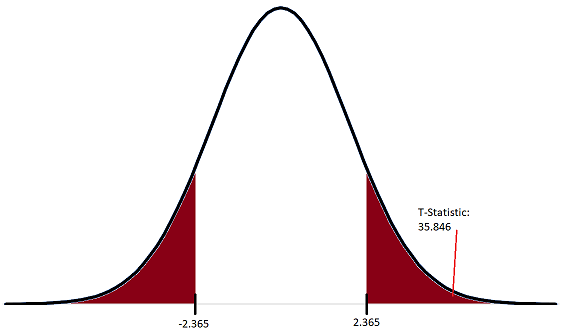

In [16]:
cdf = stats.t.cdf(x = 35.84583517268283, 
                           df = len(df_japan) - 1)

cdf

0.9999999982926084

In [17]:
sigma = df_japan['Population_Count'].std()/math.sqrt(len(df_japan))

t_interval = stats.t.interval(0.95,
                              df = len(df_japan) - 1,
                              loc = df_japan['Population_Count'].mean(),
                              scale = sigma)

t_interval

(115950955.87454437, 128570052.62545563)

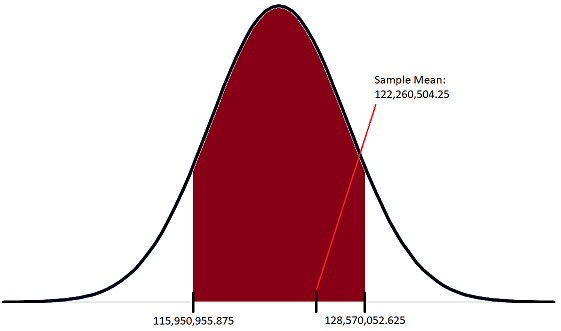

In [18]:
print('Population Mean:', df_melt['Population_Count'].mean())
print('Sample Mean (Japan):', df_japan['Population_Count'].mean())
print('T-Statistic:', results.statistic)
print('P-Value:', results.pvalue)
print('Percent Point Function Values:', (ppf_lower, ppf_upper))
print('Cumulative Distribution Function:', cdf)
print('T-Interval:', t_interval)

Population Mean: 26612736.540598292
Sample Mean (Japan): 122260504.25
T-Statistic: 35.84583517268283
P-Value: 3.414783139348842e-09
Percent Point Function Values: (-2.3646242510103, 2.3646242510102993)
Cumulative Distribution Function: 0.9999999982926084
T-Interval: (115950955.87454437, 128570052.62545563)


I got a t-statistic of 35.85 and using the percent point function range, we see that the t-statistic is within the right tail.

I got a very low p-value of 3.41e-09 and with a confidence level of 95%, it is way under 0.05.

A cumulative distribution function value of 0.999 tells us that there is a 99.99% chance of seeing a result as extreme as the one we observed.

We see that the sample mean is within the t-interval.

With all this information, we can reject the null hypothesis.

### Two-Sample T-Test

I will be comparing two sample datasets to see if they differ from one another.

Null Hypothesis: The means of both groups are the same.

Alternative Hypothesis: The means are different.

Confidence Level: 95%

Two-Tailed Test

In [19]:
# Make US the sample data

df_us = df_melt[df_melt['Country/Territory'] == 'United States']
df_us.head()

,Country/Territory,Population_Year,Population_Count
221,United States,2022 Population,338289857
455,United States,2020 Population,335942003
689,United States,2015 Population,324607776
923,United States,2010 Population,311182845
1157,United States,2000 Population,282398554


In [20]:
df_us['Population_Count'].mean()

282996640.625

In [21]:
stats.ttest_ind(a = df_japan['Population_Count'],
                b = df_us['Population_Count'],
                equal_var = False)

TtestResult(statistic=-8.417155848974334, pvalue=5.264115596715898e-05, df=7.278673062641494)

We see that the p-value is also very small at 5.26e-05. This means that we can reject the null hypothesis at a 95% confidence level for this test as well.